In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("mouse.csv")

In [ ]:
isin = np.

In [71]:
df["Minute_Index"] = df.index + 1  # Start from 1 instead of 0

# Calculate the day number (each day has 1440 minutes)
df["Day"] = ((df["Minute_Index"] - 1) // 1440) + 1
df['Nighttime'] = np.where((df['Minute_Index'] % 1440).isin(list(range(100,675))), True, False)
# Mark estrus days (Days: 2, 6, 10, 14)
df["Estrus"] = df["Day"].isin([2, 6, 10, 14])
df.to_csv('Processed_Mouse_Data.csv', index = None)


let filtered = rawData.filter(d => (!estrusOnly || d.Estrus === "True") && (!nighttimeOnly || d.Nighttime === "True"));

In [69]:
df1 = df[df["Day"] == 5]
df1 = df1[df1["Nighttime"] == False]
df1

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,Day,Estrus,Minute_Index,Nighttime
5760,38.11,36.65,36.79,37.93,38.27,36.60,37.06,37.01,37.97,37.48,38.18,36.31,37.23,5,False,5761,False
5761,38.07,36.64,36.81,37.98,38.21,36.77,37.06,36.96,37.93,37.72,38.12,36.19,37.25,5,False,5762,False
5762,38.06,36.61,36.82,38.04,38.15,36.95,37.03,36.91,37.87,37.94,38.10,36.18,37.28,5,False,5763,False
5763,38.10,36.60,37.07,38.13,38.15,36.99,37.03,36.85,37.83,38.11,38.11,36.32,37.32,5,False,5764,False
5764,38.14,36.62,37.33,38.18,38.16,37.04,37.06,36.72,37.87,38.39,38.10,36.34,37.45,5,False,5765,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,37.18,38.32,36.65,37.13,37.04,37.04,37.08,36.85,37.40,36.84,38.30,36.47,36.85,5,False,7196,False
7196,37.20,38.33,36.66,37.14,37.14,36.94,37.12,36.80,37.50,36.92,38.32,36.52,36.88,5,False,7197,False
7197,37.04,38.34,36.68,37.13,37.14,36.95,37.15,36.74,37.58,36.99,38.31,36.51,36.95,5,False,7198,False
7198,36.86,38.35,36.68,37.13,37.11,36.93,37.15,36.70,37.68,37.08,38.27,36.41,37.05,5,False,7199,False


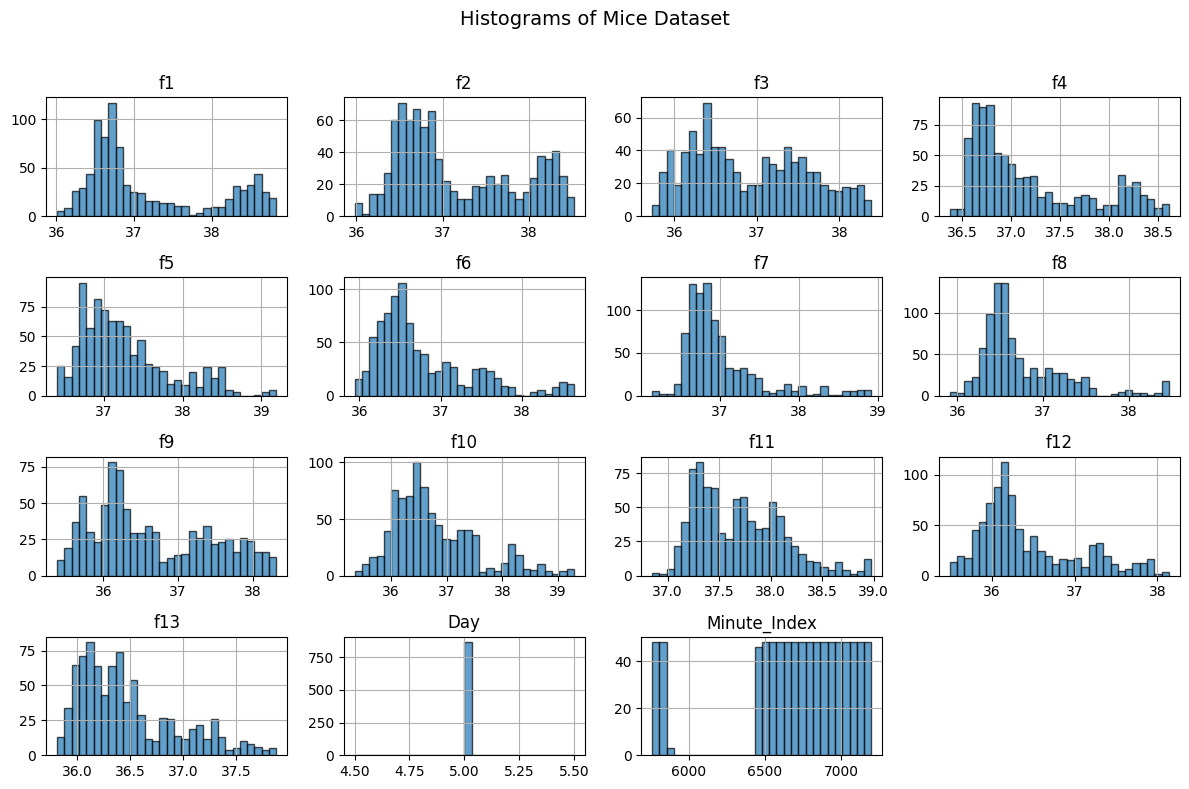

In [70]:
df1.hist(bins=30, edgecolor='black', alpha=0.7, figsize=(12, 8))

# Adjust layout
plt.suptitle("Histograms of Mice Dataset", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [51]:
toplot = df[df["Day"] == 1]
toplot = toplot.drop(columns = ["Day", "Estrus", "Minute_Index", "Nighttime"])
toplot

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,37.11,37.91,36.85,38.20,37.54,37.04,37.41,36.35,37.47,37.99,38.02,36.32,36.54
1,37.13,37.98,36.78,38.19,37.55,37.06,37.46,36.41,37.53,37.99,37.99,36.44,36.69
2,37.19,37.98,36.76,38.14,37.55,37.09,37.56,36.50,37.53,37.96,37.86,36.52,36.75
3,37.20,37.96,36.72,37.95,37.54,37.11,37.74,36.55,37.46,37.93,37.80,36.48,36.96
4,37.22,37.95,36.64,37.80,37.53,37.09,37.73,36.63,37.51,37.87,37.76,36.30,37.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,38.28,37.92,36.86,37.06,37.14,36.63,37.25,36.40,37.61,37.12,37.72,36.36,36.54
1436,38.26,37.99,36.96,37.05,37.13,36.64,37.27,36.32,37.62,37.07,37.74,36.33,36.52
1437,38.24,38.03,37.23,37.00,37.12,36.67,37.39,36.21,37.60,37.01,37.75,36.31,36.50
1438,38.19,38.06,37.40,36.97,37.14,36.89,37.50,36.25,37.60,37.04,37.74,36.31,36.48


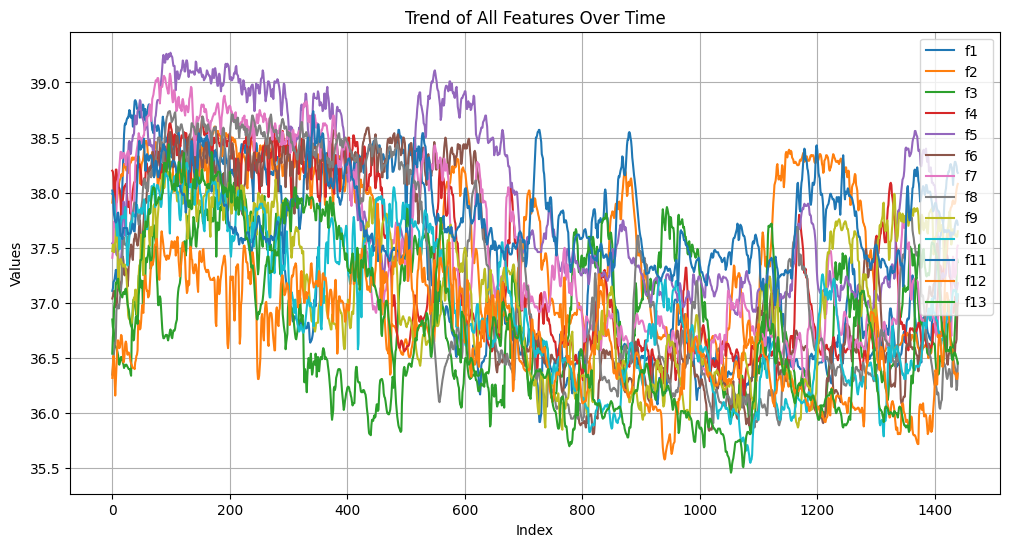

In [52]:
plt.figure(figsize=(12, 6))

for column in toplot.columns:
    plt.plot(toplot.index, toplot[column], label=column)

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Trend of All Features Over Time")
plt.legend(loc="best")
plt.grid(True)
plt.show()